In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

In [13]:
data0 = pd.read_csv("../data/train.csv", index_col=0, parse_dates=True)

In [14]:
data = data0.copy()

In [15]:
data.dropna().mean()

valeur_NO2     21.559660
valeur_CO       0.205900
valeur_O3      46.835174
valeur_PM10    17.171702
valeur_PM25    10.059627
dtype: float64

In [16]:
data.isna().sum()

valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
dtype: int64

In [17]:
pollutants = data.columns.to_list()

## Trend and Seasonality Analysis


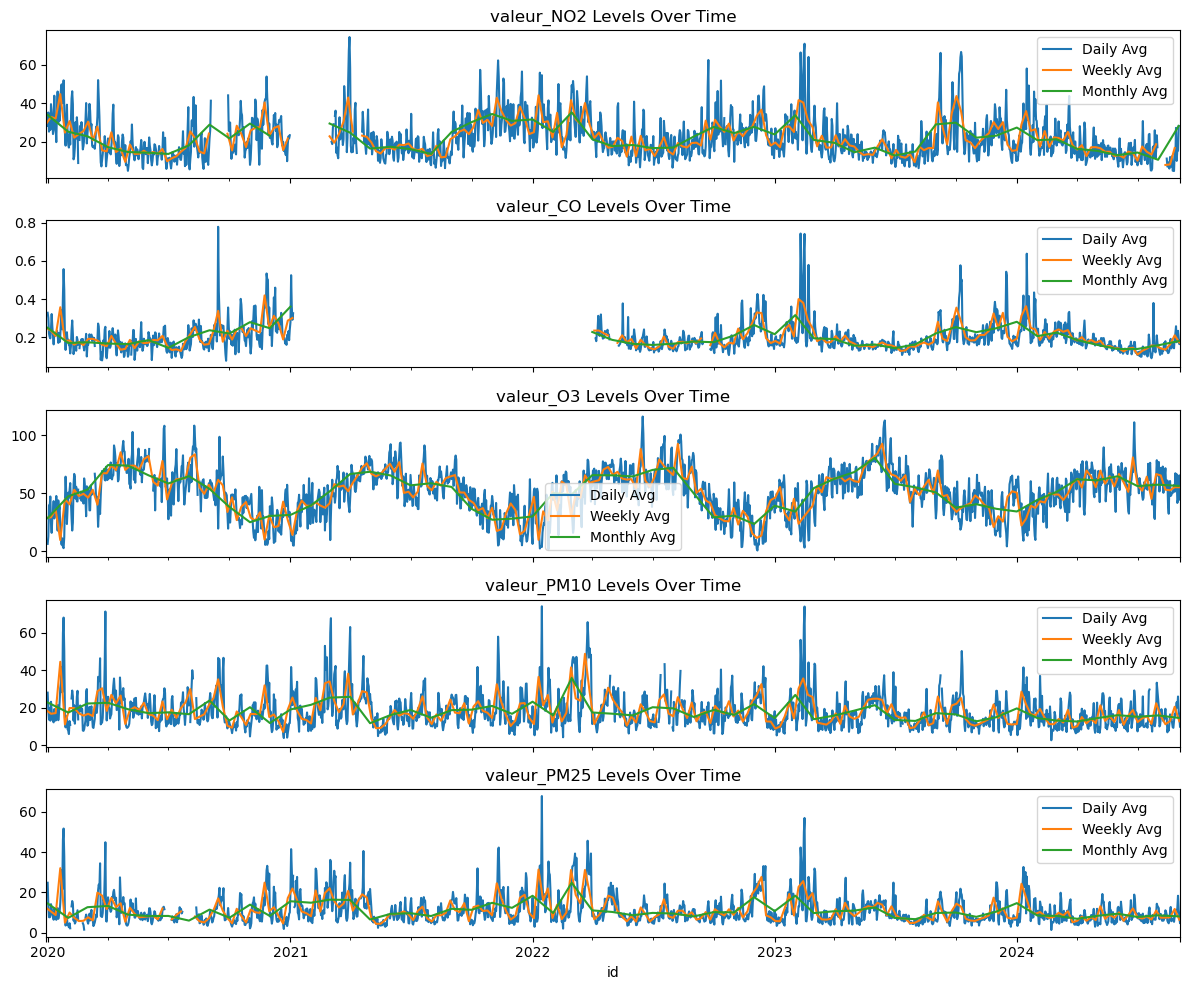

In [18]:
fig, axes = plt.subplots(len(pollutants), 1, figsize=(12, 10), sharex=True)

for i, pollutant in enumerate(pollutants):
    data[pollutant].resample('D').mean().plot(ax=axes[i], label='Daily Avg', color='tab:blue')
    data[pollutant].resample('W').mean().plot(ax=axes[i], label='Weekly Avg', color='tab:orange')
    data[pollutant].resample('ME').mean().plot(ax=axes[i], label='Monthly Avg', color='tab:green')
    axes[i].set_title(f'{pollutant} Levels Over Time')
    axes[i].legend()

plt.tight_layout()
plt.show()

We notice a large amount of missing values, from now on, we are gonna use the imputed data

In [14]:
data0 = pd.read_csv("data/train_imputed.csv")

## Stationarity Testing and Decomposition

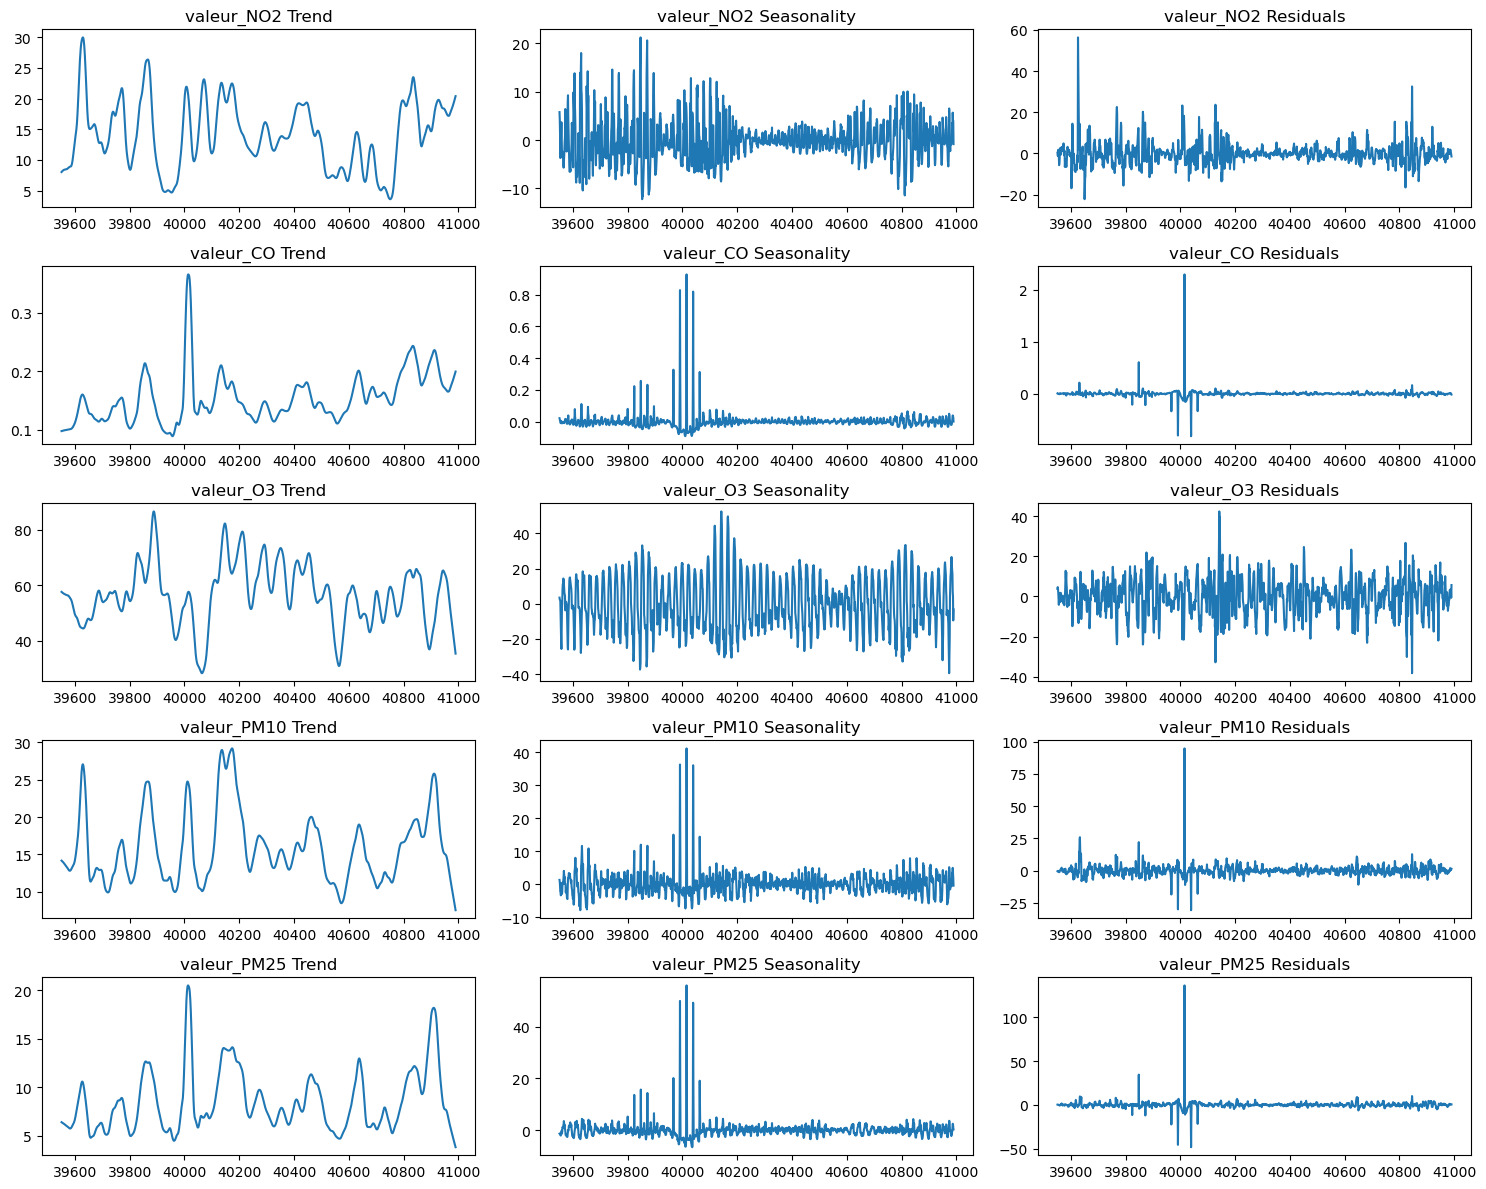

In [15]:
data = data0[-30*24*2:].copy()

# Specify the seasonal period
seasonal_period = 24

fig, axes = plt.subplots(len(pollutants), 3, figsize=(15, 12))
for i, pollutant in enumerate(pollutants):
    if len(data[pollutant].dropna()) >= seasonal_period:
        stl = STL(data[pollutant].dropna(), period=seasonal_period).fit()
        stl.trend.plot(ax=axes[i, 0], title=f'{pollutant} Trend')
        stl.seasonal.plot(ax=axes[i, 1], title=f'{pollutant} Seasonality')
        stl.resid.plot(ax=axes[i, 2], title=f'{pollutant} Residuals')
    else:
        axes[i, 0].set_title(f'Insufficient data for {pollutant}')
        axes[i, 1].set_title(f'Insufficient data for {pollutant}')
        axes[i, 2].set_title(f'Insufficient data for {pollutant}')

plt.tight_layout()
plt.show()

data = data0.copy()

In [16]:
for pollutant in pollutants:
    adf_test = adfuller(data[pollutant].dropna())
    print(f"{pollutant} ADF Statistic: {adf_test[0]}")
    print(f"{pollutant} p-value: {adf_test[1]}")
    print(f"{pollutant} {'Stationary' if adf_test[1] < 0.05 else 'Non-Stationary'}\n")

valeur_NO2 ADF Statistic: -16.15734695185311
valeur_NO2 p-value: 4.503516404230668e-29
valeur_NO2 Stationary

valeur_CO ADF Statistic: -15.513878531714193
valeur_CO p-value: 2.3297561047767565e-28
valeur_CO Stationary

valeur_O3 ADF Statistic: -11.90788018872761
valeur_O3 p-value: 5.382420172313471e-22
valeur_O3 Stationary

valeur_PM10 ADF Statistic: -16.871852705087182
valeur_PM10 p-value: 1.079546423260122e-29
valeur_PM10 Stationary

valeur_PM25 ADF Statistic: -16.245537899495904
valeur_PM25 p-value: 3.690180006538532e-29
valeur_PM25 Stationary




## Autocorrelation and Partial Autocorrelation Analysis

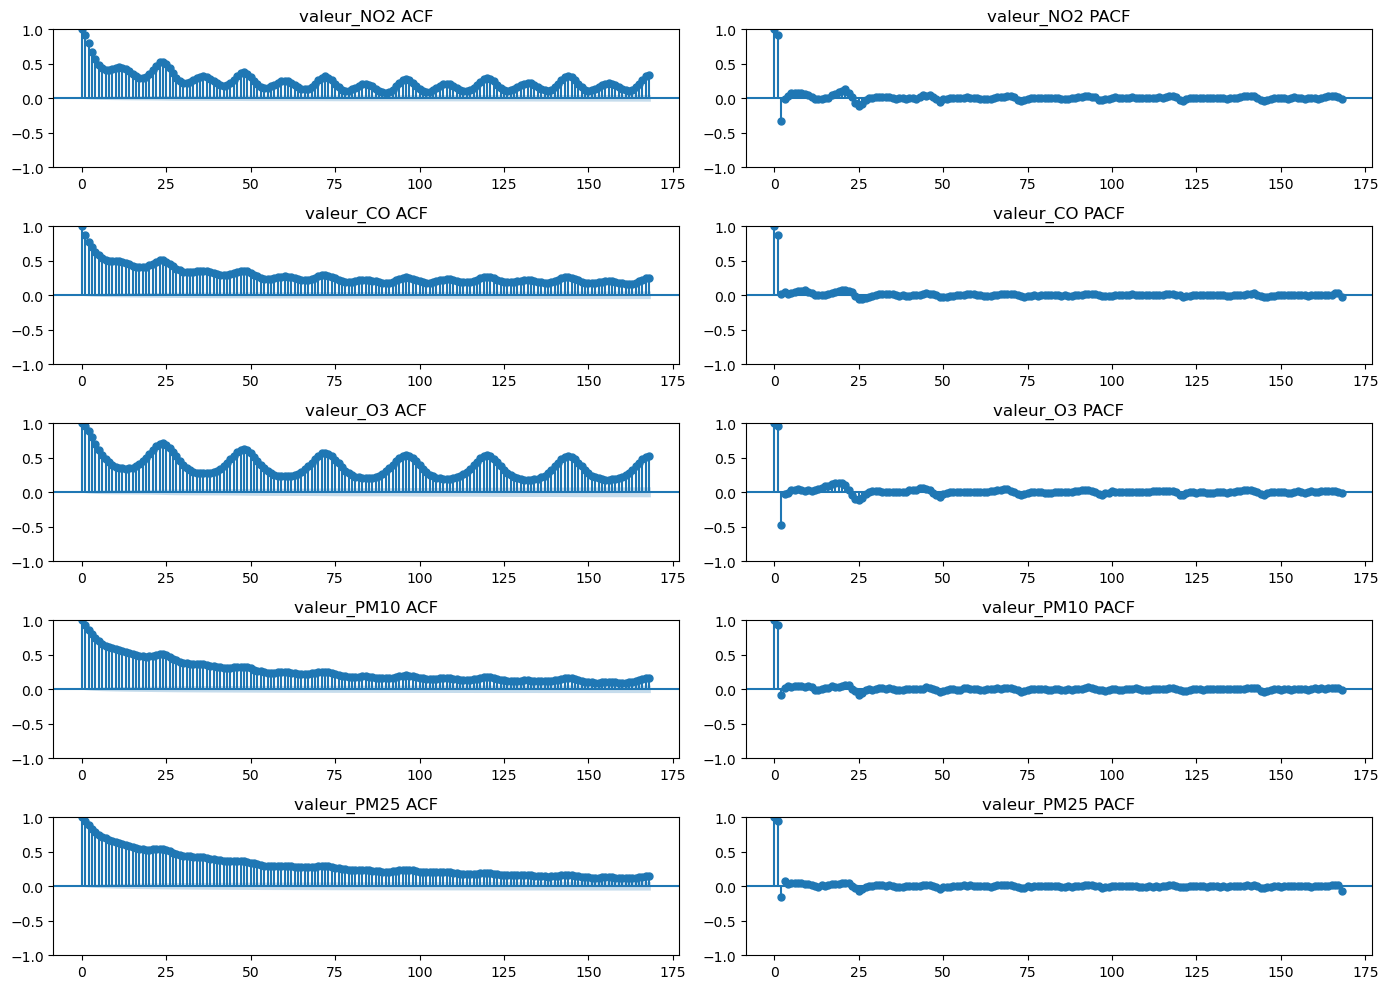

In [17]:
day = 24
n_lags = 7 * day

fig, axes = plt.subplots(len(pollutants), 2, figsize=(14, 10))
for i, pollutant in enumerate(pollutants):
    plot_acf(data[pollutant].dropna(), ax=axes[i, 0], lags=n_lags, title=f'{pollutant} ACF')
    plot_pacf(data[pollutant].dropna(), ax=axes[i, 1], lags=n_lags, title=f'{pollutant} PACF')

plt.tight_layout()
plt.show()

## Distribution Analysis and Outlier Detectio

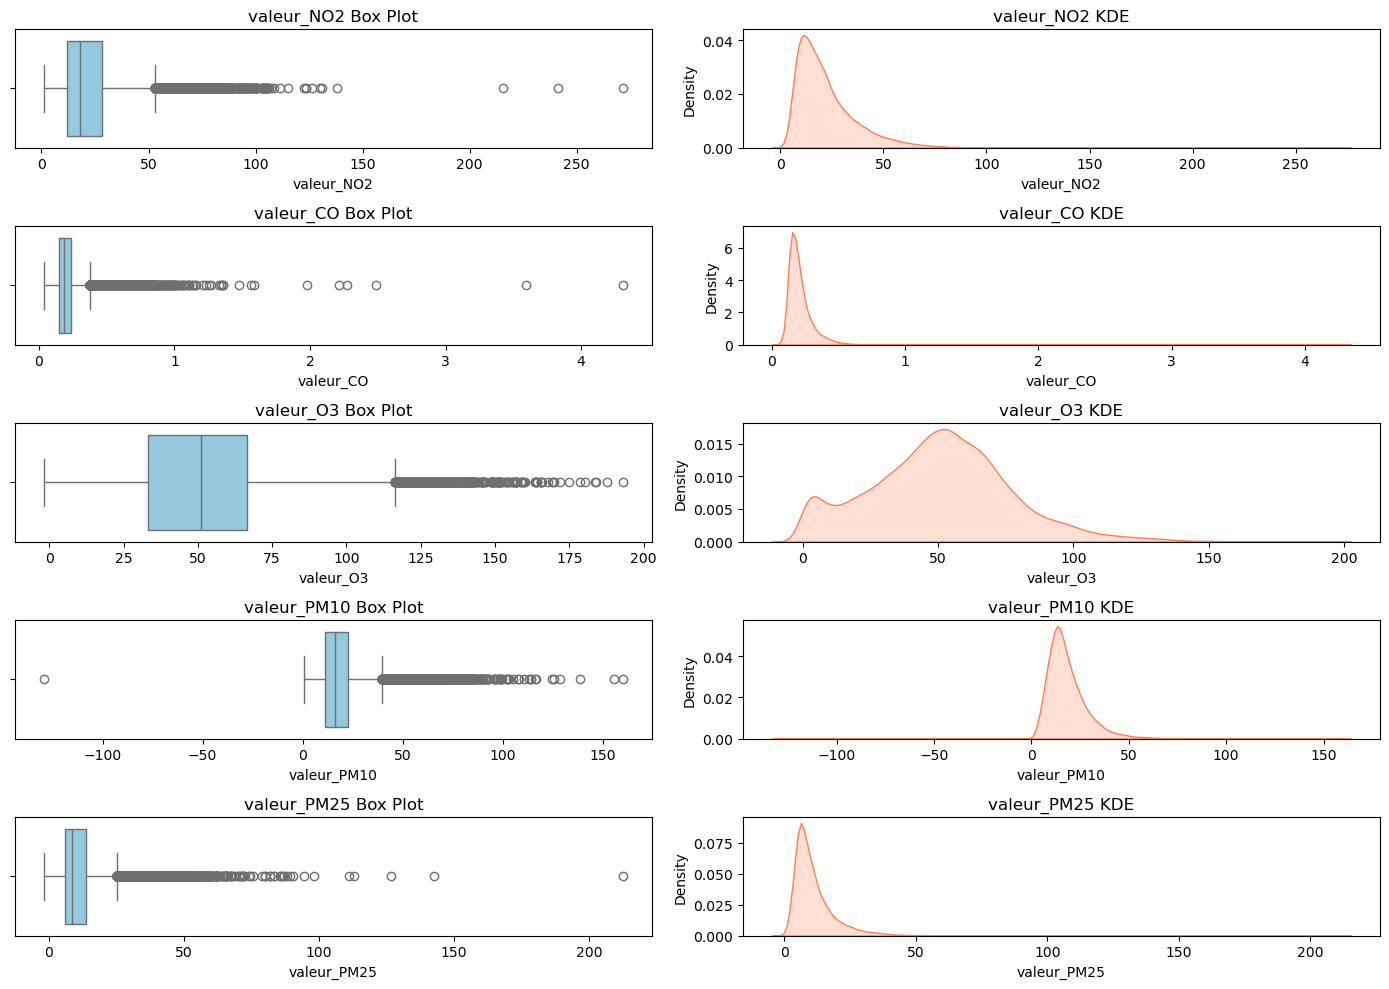

In [18]:
fig, axes = plt.subplots(len(pollutants), 2, figsize=(14, 10))
for i, pollutant in enumerate(pollutants):
    sns.boxplot(x=data[pollutant], ax=axes[i, 0], color='skyblue').set_title(f'{pollutant} Box Plot')
    sns.kdeplot(data[pollutant].dropna(), ax=axes[i, 1], fill=True, color='coral').set_title(f'{pollutant} KDE')

plt.tight_layout()
plt.show()

## Cross-Correlation Analysis Between Pollutants

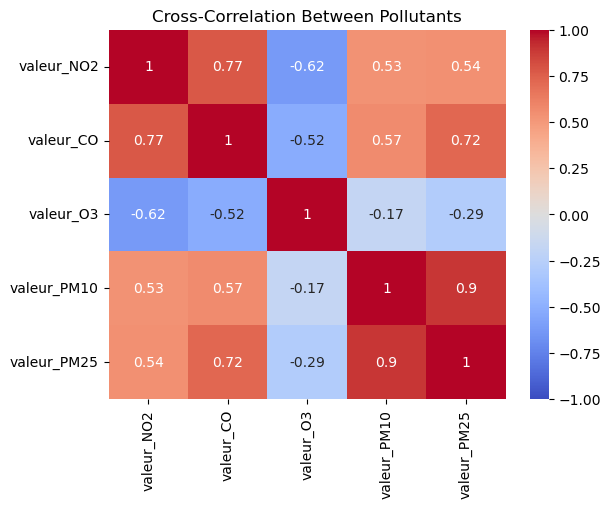

In [19]:
corr_matrix = data[pollutants].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Between Pollutants')
plt.show()

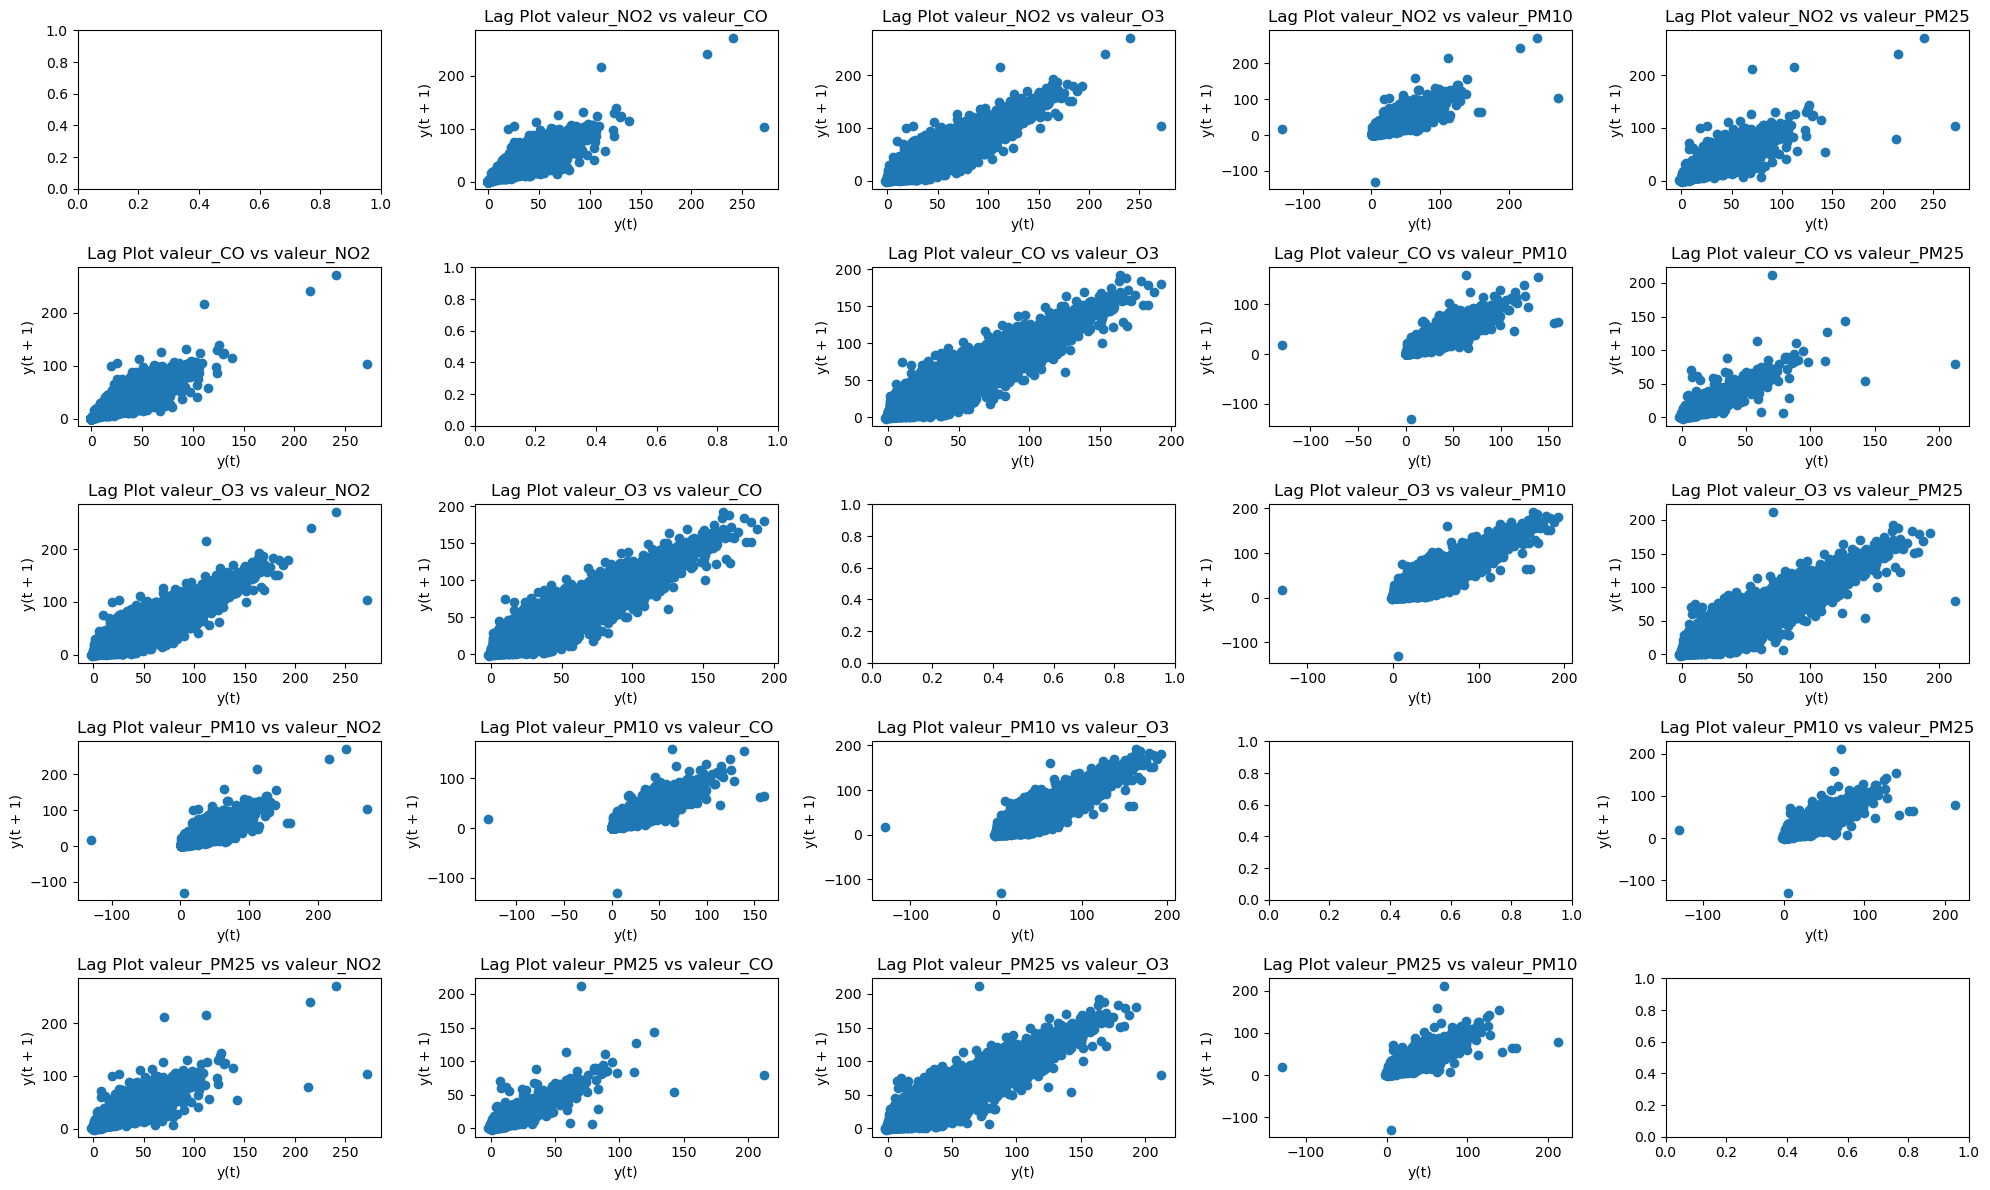

In [ ]:
# Lag plots for each pair of pollutants
fig, axes = plt.subplots(len(pollutants), len(pollutants), figsize=(20, 12))
for i, p1 in enumerate(pollutants):
    for j, p2 in enumerate(pollutants):
        if i != j:
            lag_plot(data[[p1, p2]].dropna(), lag=1, ax=axes[i, j])
            axes[i, j].set_title(f'Lag Plot {p1} vs {p2}')
plt.tight_layout()
plt.show()